In [64]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import SqueezeBertTokenizer, SqueezeBertForSequenceClassification
import pandas as pd
import torch
from transformers import Trainer
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import string
import nltk
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('testing.csv')

In [3]:
X_test = list(df_test['text'])
y_test = list(df_test['label'])

In [4]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

### ALBERT

In [7]:
model_name_albert = 'albert-base-v2'

tokenizer_albert = AlbertTokenizer.from_pretrained(model_name_albert)

X_test_tokenized = tokenizer_albert(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_albert = "D:\COS 802\Project\Albert Training\output\checkpoint-1350"

model_albert = AlbertForSequenceClassification.from_pretrained(model_path_albert, num_labels=3)

test_trainer_albert = Trainer(model_albert)

raw_pred, _, _ = test_trainer_albert.predict(test_dataset)

y_pred_albert = np.argmax(raw_pred, axis=1)

df_test['albert_preds'] = y_pred_albert

loading file https://huggingface.co/albert-base-v2/resolve/main/spiece.model from cache at C:\Users\jesse/.cache\huggingface\transformers\10be6ce6d3508f1fdce98a57a574283b47c055228c1235f8686f039287ff8174.d6110e25022b713452eb83d5bfa8ae64530995a93d8e694fe52e05aa85dd3a7d
loading file https://huggingface.co/albert-base-v2/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/albert-base-v2/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/albert-base-v2/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/albert-base-v2/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\828a43aa4b9d07e2b7d3be7c6bc10a3ae6e16e8d9c3a0c557783639de9eaeb1b.670e237d152dd53ef77575d4f4a6cd34158db03128fe4f63437ce0d5992bac74
loading configuration file https://huggingface.co/albert-base-v2/resolve/main/config.json from cache at C:\Users\jesse/.cache\huggingface\transformer

### BERT

In [8]:
model_name_bert = 'bert-base-uncased'

tokenizer_bert = BertTokenizer.from_pretrained(model_name_bert)

X_test_tokenized = tokenizer_bert(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_bert = "D:\COS 802\Project\Bert Training\output\checkpoint-1750"

model_bert = BertForSequenceClassification.from_pretrained(model_path_bert, num_labels=3)

test_trainer_bert = Trainer(model_bert)

raw_pred, _, _ = test_trainer_bert.predict(test_dataset)

y_pred_bert = np.argmax(raw_pred, axis=1)

df_test['bert_preds'] = y_pred_bert

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at C:\Users\jesse/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at C:\Users\jesse/.cache\huggingface\transformers\c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b60

### BERTweet

In [9]:
model_name_bertweet = "vinai/bertweet-base"

tokenizer_bertweet = AutoTokenizer.from_pretrained(model_name_bertweet)

X_test_tokenized = tokenizer_bertweet(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_bertweet = "D:\COS 802\Project\Bertweet Training\output\checkpoint-1700"

model_bertweet = AutoModelForSequenceClassification.from_pretrained(model_path_bertweet, num_labels=3)

test_trainer_bertweet = Trainer(model_bertweet)

raw_pred, _, _ = test_trainer_bertweet.predict(test_dataset)

y_pred_bertweet = np.argmax(raw_pred, axis=1)

df_test['bertweet_preds'] = y_pred_bertweet

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/vinai/bertweet-base/resolve/main/config.json from cache at C:\Users\jesse/.cache\huggingface\transformers\356366feedcea0917e30f7f235e1e062ffc2d28138445d5672a184be756c8686.a2b6026e688d1b19cebc0981d8f3a5b1668eabfda55b2c42049d5eac0bc8cb2d
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tokenizer_class": "BertweetTokenizer",
  "transforme

### DistilBERT

In [10]:
model_name_distilbert = "distilbert-base-uncased"

tokenizer_distilbert = DistilBertTokenizer.from_pretrained(model_name_distilbert)

X_test_tokenized = tokenizer_distilbert(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_distilbert = "D:\COS 802\Project\Distilbert Training\output\checkpoint-1750"

model_distilbert = DistilBertForSequenceClassification.from_pretrained(model_path_distilbert, num_labels=3)

test_trainer_distilbert = Trainer(model_distilbert)

raw_pred, _, _ = test_trainer_distilbert.predict(test_dataset)

y_pred_distilbert = np.argmax(raw_pred, axis=1)

df_test['distilbert_preds'] = y_pred_distilbert

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at C:\Users\jesse/.cache\huggingface\transformers\0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json from cache at C:\Users\jesse/.cache\huggingface\transformers\8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.

### MobileBERT

In [11]:
model_name_mobilebert = 'google/mobilebert-uncased'

tokenizer_mobilebert = MobileBertTokenizer.from_pretrained(model_name_mobilebert)

X_test_tokenized = tokenizer_mobilebert(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_mobilebert = "D:\COS 802\Project\Mobilebert Training\output\checkpoint-1500"

model_mobilebert = MobileBertForSequenceClassification.from_pretrained(model_path_mobilebert, num_labels=3)

test_trainer_mobilebert = Trainer(model_mobilebert)

raw_pred, _, _ = test_trainer_mobilebert.predict(test_dataset)

y_pred_mobilebert = np.argmax(raw_pred, axis=1)

df_test['mobilebert_preds'] = y_pred_mobilebert

loading file https://huggingface.co/google/mobilebert-uncased/resolve/main/vocab.txt from cache at C:\Users\jesse/.cache\huggingface\transformers\5e4066647b27a1b9dd70357bf9182b58a118ed150d03e01e016e4d5a6180bf83.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/google/mobilebert-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/google/mobilebert-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/google/mobilebert-uncased/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/google/mobilebert-uncased/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\c9be16e9fb7d1242d2721fc945935452d2eabd573cc6458bcbb029153e1c1b67.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading configuration file https://huggingface.co/google/mobilebert-uncased/resolve/main/config.j

### RoBERTa

In [12]:
model_name_roberta = "roberta-base"

tokenizer_roberta = RobertaTokenizer.from_pretrained(model_name_roberta)

X_test_tokenized = tokenizer_roberta(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_roberta = "D:\COS 802\Project\Roberta Training\output\checkpoint-1350"

model_roberta = RobertaForSequenceClassification.from_pretrained(model_path_roberta, num_labels=3)

test_trainer_roberta = Trainer(model_roberta)

raw_pred, _, _ = test_trainer_roberta.predict(test_dataset)

y_pred_roberta = np.argmax(raw_pred, axis=1)

df_test['roberta_preds'] = y_pred_roberta

loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at C:\Users\jesse/.cache\huggingface\transformers\d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at C:\Users\jesse/.cache\huggingface\transformers\cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\d53fc0fa09b8342651efd4073d7

### SqueezeBERT

In [13]:
model_name_squeezebert = 'squeezebert/squeezebert-uncased'

tokenizer_squeezebert = SqueezeBertTokenizer.from_pretrained(model_name_squeezebert)

X_test_tokenized = tokenizer_squeezebert(X_test, padding=True, truncation=True, max_length=512)

test_dataset = Dataset(X_test_tokenized)

model_path_squeezebert = "D:\COS 802\Project\Squeezebert Training\output\checkpoint-1850"

model_squeezebert = SqueezeBertForSequenceClassification.from_pretrained(model_path_squeezebert, num_labels=3)

test_trainer_squeezebert = Trainer(model_squeezebert)

raw_pred, _, _ = test_trainer_squeezebert.predict(test_dataset)

y_pred_squeezebert = np.argmax(raw_pred, axis=1)

df_test['squeezebert_preds'] = y_pred_squeezebert

loading file https://huggingface.co/squeezebert/squeezebert-uncased/resolve/main/vocab.txt from cache at C:\Users\jesse/.cache\huggingface\transformers\d595c2091b46360bc76b24b9bc1d12508d92390435ac54222d55da5ceaf6d8b2.3cb12d4c71324774a019cfab0a9c451fc3f8d26e837970c566dbb7b159d3307b
loading file https://huggingface.co/squeezebert/squeezebert-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/squeezebert/squeezebert-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/squeezebert/squeezebert-uncased/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/squeezebert/squeezebert-uncased/resolve/main/tokenizer.json from cache at C:\Users\jesse/.cache\huggingface\transformers\2107fae829069c2e2bc46b013d0665581b15dbeab589d32a37ef114cf576b7e4.728be533bb18c7d114c42783366cd8a666cf36bfba470c0b452fe72df99b0720
loading configuration file https://huggingface.co/squeezebert/squee

### Analysis

In [52]:
def tokenize(text): ## This just tokenizes the sentences to words and removes individual punctuations.
    punctuations = list(string.punctuation)
    tokens = nltk.word_tokenize(text)
    tokens = [x for x in tokens if x not in punctuations]
    stems = []
    for item in tokens:
        stems.append(WordNetLemmatizer().lemmatize(item, pos="v")) # Change this stemmer/lemmatizer and see what happens
    return stems

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


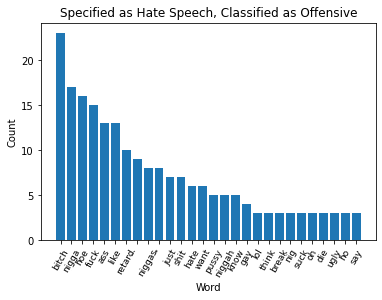

In [85]:
df_hate_class_offense =  df_test[
                                    (df_test['label']==0) &
                                    (df_test['albert_preds']==1) &   
                                    (df_test['bert_preds']==1) &
                                    (df_test['bertweet_preds']==1) & 
                                    (df_test['distilbert_preds']==1) &
                                    (df_test['mobilebert_preds']==1) &   
                                    (df_test['roberta_preds']==1) &
                                    (df_test['squeezebert_preds']==1)][['text']]



count_vectorizer = CountVectorizer(stop_words='english',tokenizer=tokenize)
cv_fit = count_vectorizer.fit_transform(df_hate_class_offense.text)

extracted = []

for i in range(len(count_vectorizer.get_feature_names())):
    
    word = count_vectorizer.get_feature_names()[i]
    
    count = cv_fit.toarray().sum(axis=0)[i]
    
    extracted.append([word,count])
    
df_x = pd.DataFrame(extracted,columns=['Word','Count'])

df_x = df_x.sort_values(['Count'],ascending=False).iloc[2:30]

plt.figure(1)
plt.bar(df_x['Word'],df_x['Count'])
plt.xticks(rotation=60,size=9)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Specified as Hate Speech, Classified as Offensive')
plt.savefig('Specified as Hate Speech, Classified as Offensive.png')
plt.show()

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


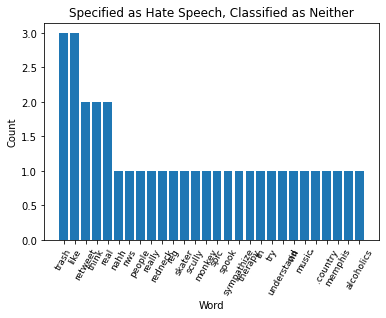

,text
435,"mentionhere nahh , whatever you are spook or s..."
1695,mentionhere mentionhere mentionhere but .count...
1809,retweet mentionhere: beyonc is trash.
1862,mentionhere mentionhere you have a redneck att...
2833,retweet mentionhere: vin scully once called me...
3345,california is home to skater trash.
3475,"mentionhere he looks like reg. memphis,tn. tra..."
3510,no. its wrong to try to change hashtagehere th...
3625,mentionhere never followed him ignorant monkey


In [86]:
df_hate_class_neither = df_test[
    (df_test['label']==0) &
    (df_test['albert_preds']==2) &   
    (df_test['bert_preds']==2) &
    (df_test['bertweet_preds']==2) & 
    (df_test['distilbert_preds']==2) &
    (df_test['mobilebert_preds']==2) &   
    (df_test['roberta_preds']==2) &
    (df_test['squeezebert_preds']==2)][['text']]
    
count_vectorizer = CountVectorizer(stop_words='english',tokenizer=tokenize)
cv_fit = count_vectorizer.fit_transform(df_hate_class_neither.text)

extracted = []

for i in range(len(count_vectorizer.get_feature_names())):
    
    word = count_vectorizer.get_feature_names()[i]
    
    count = cv_fit.toarray().sum(axis=0)[i]
    
    extracted.append([word,count])
    
df_x = pd.DataFrame(extracted,columns=['Word','Count'])

df_x = df_x.sort_values(['Count'],ascending=False).iloc[2:30]

plt.figure(1)
plt.bar(df_x['Word'],df_x['Count'])
plt.xticks(rotation=60,size=9)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Specified as Hate Speech, Classified as Neither')
plt.savefig('Specified as Hate Speech, Classified as Neither.png')
plt.show()

df_hate_class_neither

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


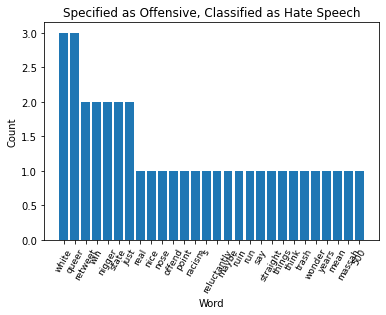

,text
106,retweet mentionhere: 500 years of racism and t...
224,hahahaha manziel is a faggot and the browns wi...
825,mentionhere no wonder you run nose first for y...
1800,greatwhiteprivilege: straight people are likec...
2050,"retweet mentionhere: contrary to belief, us qu..."
2346,the irish in hashtagehere are all white trash.
3394,"maybe reluctantly, but they have done it. what..."


In [87]:
df_offensive_class_hate = df_test[
    (df_test['label']==1) &
    (df_test['albert_preds']==0) &   
    (df_test['bert_preds']==0) &
    (df_test['bertweet_preds']==0) & 
    (df_test['distilbert_preds']==0) &
    (df_test['mobilebert_preds']==0) &   
    (df_test['roberta_preds']==0) &
    (df_test['squeezebert_preds']==0)][['text']]
    
count_vectorizer = CountVectorizer(stop_words='english',tokenizer=tokenize)
cv_fit = count_vectorizer.fit_transform(df_offensive_class_hate.text)

extracted = []

for i in range(len(count_vectorizer.get_feature_names())):
    
    word = count_vectorizer.get_feature_names()[i]
    
    count = cv_fit.toarray().sum(axis=0)[i]
    
    extracted.append([word,count])
    
df_x = pd.DataFrame(extracted,columns=['Word','Count'])

df_x = df_x.sort_values(['Count'],ascending=False).iloc[2:30]

plt.figure(1)
plt.bar(df_x['Word'],df_x['Count'])
plt.xticks(rotation=60,size=9)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Specified as Offensive, Classified as Hate Speech')
plt.savefig('Specified as Offensive, Classified as Hate Speech.png')
plt.show()

df_offensive_class_hate

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


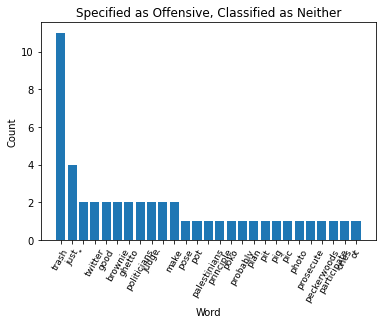

,text
43,blatt trash too. but twitter said he was good
75,lmaooo wait so why everybody talm bout card cr...
131,"mentionhere that is trash, its ot?"
701,retweet mentionhere: if there was an invisible...
763,i just cannot imagine myself being albino haha
790,"mentionhere: mentionhere wow, putting a whole..."
946,mentionhere mentionhere you all trash but ment...
970,bae made me deep fried oreos
989,"retweet mentionhere: being loud, ghetto energe..."
1050,retweet mentionhere: nike beanies hashtagehere


In [88]:
df_offensive_class_neither = df_test[
    (df_test['label']==1) &
    (df_test['albert_preds']==2) &   
    (df_test['bert_preds']==2) &
    (df_test['bertweet_preds']==2) & 
    (df_test['distilbert_preds']==2) &
    (df_test['mobilebert_preds']==2) &   
    (df_test['roberta_preds']==2) &
    (df_test['squeezebert_preds']==2)][['text']]
    
count_vectorizer = CountVectorizer(stop_words='english',tokenizer=tokenize)
cv_fit = count_vectorizer.fit_transform(df_offensive_class_neither.text)

extracted = []

for i in range(len(count_vectorizer.get_feature_names())):
    
    word = count_vectorizer.get_feature_names()[i]
    
    count = cv_fit.toarray().sum(axis=0)[i]
    
    extracted.append([word,count])
    
df_x = pd.DataFrame(extracted,columns=['Word','Count'])

df_x = df_x.sort_values(['Count'],ascending=False).iloc[3:30]

plt.figure(1)
plt.bar(df_x['Word'],df_x['Count'])
plt.xticks(rotation=60,size=9)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Specified as Offensive, Classified as Neither')
plt.savefig('Specified as Offensive, Classified as Neither.png')
plt.show()

df_offensive_class_neither

In [27]:
for i in df_test[
    (df_test['label']==2) &
    (df_test['albert_preds']==0) &   
    (df_test['bert_preds']==0) &
    (df_test['bertweet_preds']==0) & 
    (df_test['distilbert_preds']==0) &
    (df_test['mobilebert_preds']==0) &   
    (df_test['roberta_preds']==0) &
    (df_test['squeezebert_preds']==0)]['text'].values:
    
    print(i)

mentionhere god bless you whitey. i be sleepin in tomorrow


C:\Users\jesse\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


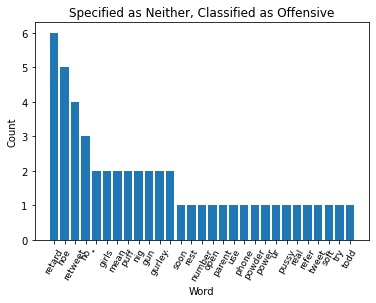

,text
68,"retweet mentionhere: ""never go full retard"""
253,i am getting sleepy and my phone is acting ret...
274,how long are they going to let the fools in ha...
583,"mentionhere mentionhere hoe hoe hoe, merry chr..."
676,mentionhere it is retarded. ignore the harlem ...
911,mentionhere mentionhere mentionhere lax gun la...
971,retweet mentionhere: when i say tainted i do n...
1186,retweet mentionhere: mentionhere np big nig nig
1482,retweet mentionhere: here come wiggas soft twe...
1666,mentionhere ho ho ho.


In [89]:
df_neither_class_offensive =  df_test[
    (df_test['label']==2) &
    (df_test['albert_preds']==1) &   
    (df_test['bert_preds']==1) &
    (df_test['bertweet_preds']==1) & 
    (df_test['distilbert_preds']==1) &
    (df_test['mobilebert_preds']==1) &   
    (df_test['roberta_preds']==1) &
    (df_test['squeezebert_preds']==1)][['text']]
    
    
count_vectorizer = CountVectorizer(stop_words='english',tokenizer=tokenize)
cv_fit = count_vectorizer.fit_transform(df_neither_class_offensive.text)

extracted = []

for i in range(len(count_vectorizer.get_feature_names())):
    
    word = count_vectorizer.get_feature_names()[i]
    
    count = cv_fit.toarray().sum(axis=0)[i]
    
    extracted.append([word,count])
    
df_x = pd.DataFrame(extracted,columns=['Word','Count'])

df_x = df_x.sort_values(['Count'],ascending=False).iloc[1:30]

plt.figure(1)
plt.bar(df_x['Word'],df_x['Count'])
plt.xticks(rotation=60,size=9)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Specified as Neither, Classified as Offensive')
plt.savefig('Specified as Neither, Classified as Offensive.png')
plt.show()

df_neither_class_offensive